In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [3]:
# class RecurrentNeuralNetwork(nn.Module):
#     def __init__(self):
#         super(RecurrentNeuralNetwork, self).__init__()
#         hidden = torch.zeros(5,15)
#         cell =  torch.zeros(5,15)
#         self.batch =  (hidden, cell)
#         self.fc1 = nn.Linear(24, 30)   
#         self.rnn = nn.LSTM(30,15 , 5,batch_first=True)
#         self.fc2 = nn.Linear(15, 1)
#         self.relu =  nn.ReLU()
#         self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)  # Agregamos LeakyReLU
#         self.sigmoid = nn.Identity()

#     def forward(self, x): 
#         x = self.relu(self.fc1(x)) 
#         x = self.leaky_relu(x)  
#         x, self.batch = self.rnn(x, self.batch)
#         x = self.leaky_relu(x)  
#         x = self.fc2(x)
#         x = self.sigmoid(x)
#         return x


In [4]:
train_data = pd.read_csv('/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/results/train_dataset_pca.csv')
test_data = pd.read_csv('/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/results/test_dataset_pca.csv')

In [5]:
train_data.shape.__getitem__(1)

25

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X_train = torch.tensor(train_data.drop('category', axis=1).values).float()
y_train = torch.tensor(train_data['category'].values).view(-1, 1).float()
X_test = torch.tensor(test_data.drop('category', axis=1).values).float()
y_test = torch.tensor(test_data['category'].values).view(-1, 1).float()

In [15]:
X_test

tensor([[-1.8719e+00,  9.5374e-01, -9.2541e-03,  ..., -3.0361e-01,
          1.0119e-02,  4.2599e-01],
        [-1.5269e+00,  1.1766e+00, -5.7230e-02,  ..., -9.8120e-02,
          2.8355e-03, -1.7259e-01],
        [ 2.7619e+00,  3.0633e+00, -1.2302e+00,  ..., -2.6059e+00,
          7.4816e-02, -1.8710e+00],
        ...,
        [-2.5090e+00, -1.0908e+00,  5.1043e-01,  ...,  9.2696e-02,
          1.6503e-02, -5.2496e-01],
        [ 2.9256e+00, -8.6861e+00,  1.3898e+00,  ...,  3.6282e-02,
          2.8569e-03, -6.9891e-03],
        [-1.8811e+00,  9.3592e-01, -5.5224e-03,  ..., -3.4036e-01,
          1.0854e-02,  4.2303e-01]], device='cuda:0')

In [9]:

train_data.head()

,PCS-0,PCS-1,PCS-2,PCS-3,PCS-4,PCS-5,PCS-6,PCS-7,PCS-8,PCS-9,...,PCS-15,PCS-16,PCS-17,PCS-18,PCS-19,PCS-20,PCS-21,PCS-22,PCS-23,category
0,-1.719427,1.041112,-0.029033,-0.033945,0.488359,-0.320245,0.675607,0.040008,-0.850674,0.904590,...,0.166457,0.296350,0.170225,0.126065,-0.012936,-0.078119,-0.217705,0.006862,0.172171,0
1,-2.513016,0.378792,0.180003,-0.033389,0.509032,-0.166350,0.247207,-0.138200,0.478633,-0.355185,...,-0.423369,0.428696,-0.498758,-0.567661,0.053651,0.042064,-0.002884,0.018795,-0.570877,0
2,7.169543,0.970827,-0.545971,0.185807,-3.243937,-0.199090,-1.077415,-0.185070,1.729826,0.188037,...,-1.130055,-0.283804,0.332416,0.275258,-0.572652,-0.638327,0.332787,-0.019409,0.268257,1
3,-2.484802,0.321382,0.182738,-0.022501,0.317128,-0.203769,0.532316,-0.171392,0.235577,-0.311109,...,-0.340788,0.405275,-0.597997,-0.307447,0.088032,0.105859,0.135460,0.017582,-0.613108,0
4,0.095984,-6.182967,0.574045,0.176454,-3.033600,-0.513644,0.781771,1.736568,1.722352,-6.504171,...,2.019361,-2.565433,2.824614,-0.946937,0.259488,-0.222455,1.541727,-0.026497,-0.191912,0


In [18]:
X_train[0]

tensor([-1.7194e+00,  1.0411e+00, -2.9033e-02, -3.3945e-02,  4.8836e-01,
        -3.2024e-01,  6.7561e-01,  4.0008e-02, -8.5067e-01,  9.0459e-01,
         1.4184e+00,  1.5811e-01, -1.1586e-03,  1.9821e-01, -2.6115e-01,
         1.6646e-01,  2.9635e-01,  1.7022e-01,  1.2607e-01, -1.2936e-02,
        -7.8119e-02, -2.1770e-01,  6.8619e-03,  1.7217e-01], device='cuda:0')

In [20]:
X_train.shape

torch.Size([2218023, 24])

In [27]:
# class RecurrentNeuralNetwork(nn.Module):
#     def __init__(self):
#         super(RecurrentNeuralNetwork, self).__init__()
#         self.hidden_size = 15
#         self.num_layers = 5
#         self.fc1 = nn.Linear(24, 30)
#         self.rnn = nn.LSTM(30, self.hidden_size, self.num_layers, batch_first=True)
#         self.fc2 = nn.Linear(self.hidden_size, 1)
#         self.leaky_relu = nn.ReLU()
#         self.relu = nn.LeakyReLU(negative_slope=0.01)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.relu(self.fc1(x))
#         x, (hidden, cell) = self.rnn(x)
#         x = self. relu(x)
#         x = self.fc2(x)
#         x = self.sigmoid(x)
#         return x
class RecurrentNeuralNetwork(nn.Module):
    def __init__(self, size_input):
        super(RecurrentNeuralNetwork, self).__init__()
        self.hidden_size = 15
        self.num_layers = 5
        self.fc1 = nn.Linear(size_input, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(self.hidden_size, 15)
        self.fc4 = nn.Linear(self.hidden_size, 1)
        self.rnn = nn.LSTM(30, self.hidden_size, self.num_layers, batch_first=True)
        self.rnn2 = nn.LSTM(15, self.hidden_size, self.num_layers)
        self.gru_layer = nn.GRU(input_size=self.hidden_size, hidden_size=self.hidden_size, num_layers=self.num_layers)

        self.maxpool = nn.MaxPool1d(kernel_size=2)

        self.relu = nn.ReLU()
        self.elu = nn.ELU()
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
 
        x, (hidden, cell) = self.rnn(x)
        x = self.relu(x)
        x = self.fc3(x)

        x, (hidden, cell) = self.rnn2(x)
 
        x, hidden = self.gru_layer(x, hidden)

        x = self.fc4(x)
        x = self.sigmoid(x)

        return x


In [30]:

model = RecurrentNeuralNetwork(X_train.shape.__getitem__(1))
model.to(device)
optimizer = optim.ASGD(model.parameters(), lr=0.5)
criterion = nn.BCEWithLogitsLoss().to(device)
loss_values = []
accuracy_values = []

num_epochs = 50
batch_size = 100  # Reduje el tamaño del lote

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    total_batches = 0

    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i + batch_size]
        batch_y = y_train[i:i + batch_size]
        outputs = model(batch_X.to(device)) 
        optimizer.zero_grad()
        loss = criterion(outputs, batch_y.to(device))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_batches += 1
        print(total_loss / total_batches, end='\r')

    average_loss = total_loss / total_batches
    loss_values.append(average_loss)
    model.eval()
    with torch.no_grad():
        outputs = model(X_test.to(device))
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == y_test.to(device)).float().mean()
        accuracy_values.append(accuracy.item())
    print(f'Epoch [{epoch + 1}/{num_epochs}], Avg. Loss: {average_loss}, Accuracy: {accuracy.item()}')

Epoch [1/50], Avg. Loss: 0.6933164055598642, Accuracy: 0.5332985520362854
Epoch [2/50], Avg. Loss: 0.6932325859000172, Accuracy: 0.5332985520362854
Epoch [3/50], Avg. Loss: 0.6932317679585448, Accuracy: 0.5332985520362854
Epoch [4/50], Avg. Loss: 0.6932314918225141, Accuracy: 0.5332985520362854
Epoch [5/50], Avg. Loss: 0.6932313905744276, Accuracy: 0.5332985520362854
Epoch [6/50], Avg. Loss: 0.6932313634042115, Accuracy: 0.5332985520362854
Epoch [7/50], Avg. Loss: 0.6932313684937566, Accuracy: 0.5332985520362854
Epoch [8/50], Avg. Loss: 0.693231387416975, Accuracy: 0.5332985520362854
Epoch [9/50], Avg. Loss: 0.6932314105564004, Accuracy: 0.5332985520362854
Epoch [10/50], Avg. Loss: 0.6932314364743842, Accuracy: 0.5332985520362854
Epoch [11/50], Avg. Loss: 0.6932314600571966, Accuracy: 0.5332985520362854
Epoch [12/50], Avg. Loss: 0.6932314831590014, Accuracy: 0.5332985520362854
Epoch [13/50], Avg. Loss: 0.6932315033532624, Accuracy: 0.5332985520362854
Epoch [14/50], Avg. Loss: 0.6932315

In [72]:

with torch.no_grad():
    outputs = model(X_test)
    print(outputs)
    # predicted = (outputs > 0.5).float()
    # accuracy = (predicted == y_test).float().mean()
    # accuracy_values.append(accuracy.item())
    # print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}, Accuracy: {accuracy.item()}')

tensor([[0.0808],
        [0.0674],
        [0.0610],
        ...,
        [0.0524],
        [0.0524],
        [0.0524]])


In [80]:
loss = criterion(outputs, y_test)

In [81]:
loss

tensor(0.6952)

In [89]:
f = (outputs > 0.5).float()
accuracy = (predicted == y_test)

In [90]:
accuracy

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [False]])

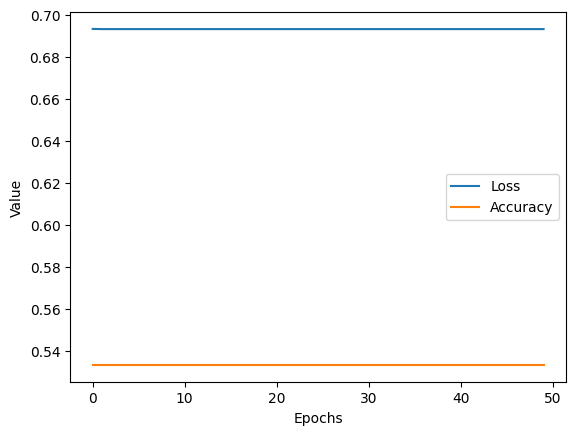

In [31]:
plt.plot(loss_values, label='Loss')
plt.plot(accuracy_values, label='Accuracy')
plt.xlabel('Epochs')

plt.ylabel('Value')
plt.legend()
plt.show()

In [10]:
accuracy_values

[0.5470033288002014,
 0.5483744144439697,
 0.5508905649185181,
 0.5538797378540039,
 0.5566412210464478,
 0.5595460534095764,
 0.561373770236969,
 0.5621266961097717,
 0.5622444152832031,
 0.5621718168258667]